In [1]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, train_test_split

DATA_PATH = "D:/data/school/" # Make this the /path/to/the/data

# import data

In [2]:
data_class_size = pd.read_csv(DATA_PATH + "2010-2011_Class_Size_-_School-level_detail.csv")
data_graduation = pd.read_csv(DATA_PATH + "Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv")
data_sat_results = pd.read_csv(DATA_PATH + "SAT_Results.csv")
data_attendance = pd.read_csv(DATA_PATH + 'School_Attendance_and_Enrollment_Statistics_by_District__2010-11_.csv')
data_school_grade = pd.read_csv(DATA_PATH + 'School_Progress_Report_2010-2011.csv')
data_graduation_new = pd.read_csv(DATA_PATH + "Graduation_Outcomes_-_School_Level_-_Classes_2010-2011_-_Regents-based_Math_ELA_APM_-_Total_Cohort.csv")


# Data Clean

### Class size data

In [86]:
data_class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [3]:
def add_DBN_to_class(row):
    dbn = "{0:02d}{1}".format(row["CSD"], row["SCHOOL CODE"])
    return dbn
    
data_class_size["DBN"] = data_class_size.apply(add_DBN_to_class, axis=1)

In [4]:
class_size_temp = data_class_size.drop(['CSD', 'BOROUGH', 'SCHOOL CODE'], 1)
class_size_temp = class_size_temp[class_size_temp["GRADE "] == '09-12']
class_size_temp = class_size_temp[class_size_temp["PROGRAM TYPE"] == 'GEN ED']
class_size_temp = class_size_temp.groupby("DBN").agg(np.mean)

In [5]:
data_class_size_final = class_size_temp.reset_index()
data_class_size_final = data_class_size_final[['DBN', 'AVERAGE CLASS SIZE']]

In [87]:
data_class_size_final.head()

,DBN,AVERAGE CLASS SIZE
0,01M292,22.564286
1,01M332,22.000000
2,01M378,33.000000
3,01M448,22.231250
4,01M450,21.200000


###### In class size data, we add DBN to table first. Then, we only select rows which "GRADE" = "09-12" and "PROGRAM TYPE" = 'GEN ED'. Finally, we only take DBN and average class size columns.

### SAT result data

In [88]:
data_sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [6]:
sat_results_temp = data_sat_results.drop("Num of SAT Test Takers", 1)
sat_results_temp['SAT Math Avg. Score'] = sat_results_temp['SAT Math Avg. Score'].convert_objects(convert_numeric = True)
sat_results_temp['SAT Critical Reading Avg. Score'] = sat_results_temp['SAT Critical Reading Avg. Score'].convert_objects(convert_numeric = True)
sat_results_temp['SAT Writing Avg. Score'] = sat_results_temp['SAT Writing Avg. Score'].convert_objects(convert_numeric = True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [7]:
sat_results_temp["Total_Avg"] = sat_results_temp.apply(lambda x: x['SAT Math Avg. Score'] + x['SAT Critical Reading Avg. Score'] + x['SAT Writing Avg. Score'], axis=1)

In [8]:
sat_results_temp = sat_results_temp.rename(columns={"Total_Avg":"SAT_Avg",})
sat_results_final = sat_results_temp[['DBN', 'SAT_Avg']]

In [89]:
sat_results_final.head()

,DBN,SAT_Avg
0,01M292,1122.0
1,01M448,1172.0
2,01M450,1149.0
3,01M458,1174.0
4,01M509,1207.0


###### In sat results data, we convert datas to numeric type. Then, we add a "SAT_Avg" column which is sum of math, reading and writing score. Finally, we only take DBN and SAT_Avg. 

### Attendance data

In [90]:
data_attendance.head()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,01,91.18%,12367
1,02,89.01%,60823
2,03,89.28%,21962
3,04,91.13%,14252
4,05,89.08%,13170


In [9]:
attendance_temp = data_attendance
attendance_temp['District'] = data_attendance.apply(lambda x: x['District'].replace('DISTRICT ', ''), axis=1)
attendance_temp = attendance_temp.drop([33, 34])
attendance_temp['District'] = attendance_temp.apply(lambda x: x['District'].replace('SPECIAL ED ', ''), axis=1)
attendance_temp['YTD % Attendance (Avg)'] = attendance_temp.apply(lambda x: x['YTD % Attendance (Avg)'].replace('%', ''), axis=1)
attendance_temp = attendance_temp.rename(columns={'YTD % Attendance (Avg)':'Avg_ttendance', 'YTD Enrollment(Avg)':'Avg_enrollment'})


In [10]:
attendance_temp.dtypes

District          object
Avg_ttendance     object
Avg_enrollment     int64
dtype: object

In [11]:
attendance_temp = attendance_temp.rename(columns={'Avg_ttendance':"Avg_atendance" })
attendance_temp['Avg_atendance'] = attendance_temp['Avg_atendance'].convert_objects(convert_numeric = True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [12]:
attendance_final = attendance_temp

In [91]:
attendance_final.head()

,District,Avg_atendance,Avg_enrollment
0,01,91.18,12367
1,02,89.01,60823
2,03,89.28,21962
3,04,91.13,14252
4,05,89.08,13170


###### In attendance data, we remove useless district first. Second, we rename the columns. Third, we convert data type to numeric.

### School grade data

In [92]:
data_school_grade.head()

,﻿DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M015,1,P.S. 015 Roberto Clemente,Irene Sanchez,EMS,Elementary,63.61,C,27.0,6.4,B,2.1,D,18.0,C,0.5,C
1,01M019,1,P.S. 019 Asher Levy,Jacqueline Flanagan,EMS,Elementary,49.48,B,48.7,7.8,B,5.2,D,35.1,A,0.5,C
2,01M020,1,P.S. 020 Anna Silver,James Lee,EMS,Elementary,56.65,B,48.2,7.7,B,7.4,C,31.1,B,2.0,A
3,01M034,1,P.S. 034 Franklin D. Roosevelt,Joyce Stallings Harte,EMS,K-8,67.97,C,39.8,7.5,B,11.3,B,18.5,C,2.5,B
4,01M063,1,P.S. 063 William McKinley,Darlene Despeignes,EMS,Elementary,58.85,B,49.0,8.1,B,10.4,B,29.0,B,1.5,B


In [13]:
school_grade_temp = data_school_grade[data_school_grade["SCHOOL LEVEL*"] == "High School"]

In [14]:
school_grade_temp = school_grade_temp.drop(["DISTRICT", "SCHOOL", "PRINCIPAL", "PROGRESS REPORT TYPE", "SCHOOL LEVEL*"], axis=1)

In [15]:
school_grade_final = school_grade_temp.rename(columns={'\ufeffDBN':'DBN'})

In [93]:
school_grade_final.head()

,DBN,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
14,01M292,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
23,01M448,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
25,01M450,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
27,01M509,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
30,01M539,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B


###### For school grade data, we drop some useless columns, and rename some columns.

### Merge datas

In [94]:
data_sat_results.shape

(478, 6)

In [95]:
data_class_size_final.shape

(583, 2)

In [18]:
sat_class_size = pd.merge(data_class_size_final, sat_results_final, how='inner', on='DBN')
sat_class_size = sat_class_size.dropna()

In [19]:
sat_class_size_temp = sat_class_size
sat_class_size_temp['District'] = sat_class_size_temp.apply(lambda x: x['DBN'][0:2], axis=1)

In [20]:
sat_size_atte = pd.merge(sat_class_size_temp, attendance_final, how='inner', on='District')

In [21]:
sat_size_atte_grade = pd.merge(sat_size_atte, school_grade_final, how='inner', on='DBN')

In [22]:
grade_remove_col = ["2010-2011 OVERALL GRADE", "2010-2011 ENVIRONMENT GRADE", "2010-2011 PERFORMANCE GRADE", "2010-2011 PROGRESS GRADE", "2010-2011 ADDITIONAL CREDIT", "2009-10 PROGRESS REPORT GRADE"]

In [23]:
sat_size_atte_grade_temp = sat_size_atte_grade.drop(grade_remove_col, axis=1)

In [24]:
sat_size_atte_grade_temp = sat_size_atte_grade_temp.dropna()


In [85]:
sat_size_atte_grade_temp.head()

,DBN,AVERAGE CLASS SIZE,SAT_Avg,District,Avg_atendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,1122.0,01,91.18,12367,1.81,49.8,6.9,12.8,30.1
1,01M448,22.231250,1172.0,01,91.18,12367,2.03,57.6,6.9,13.9,35.8
2,01M450,21.200000,1149.0,01,91.18,12367,2.26,77.0,12.9,18.4,38.7
3,01M509,23.571429,1207.0,01,91.18,12367,1.78,54.0,6.7,15.7,30.6
4,01M539,25.510526,1621.0,01,91.18,12367,3.48,71.9,7.7,21.8,42.4


# Visualizing data

In [25]:
list(sat_size_atte_grade_temp.columns.values)

['DBN',
 'AVERAGE CLASS SIZE',
 'SAT_Avg',
 'District',
 'Avg_atendance',
 'Avg_enrollment',
 'PEER INDEX*',
 '2010-2011 OVERALL SCORE',
 '2010-2011 ENVIRONMENT CATEGORY SCORE',
 '2010-2011 PERFORMANCE CATEGORY SCORE',
 '2010-2011 PROGRESS CATEGORY SCORE']

In [26]:
sat_size_atte_grade_temp.dtypes

DBN                                      object
AVERAGE CLASS SIZE                      float64
SAT_Avg                                 float64
District                                 object
Avg_atendance                           float64
Avg_enrollment                            int64
PEER INDEX*                             float64
2010-2011 OVERALL SCORE                 float64
2010-2011 ENVIRONMENT CATEGORY SCORE    float64
2010-2011 PERFORMANCE CATEGORY SCORE    float64
2010-2011 PROGRESS CATEGORY SCORE       float64
dtype: object

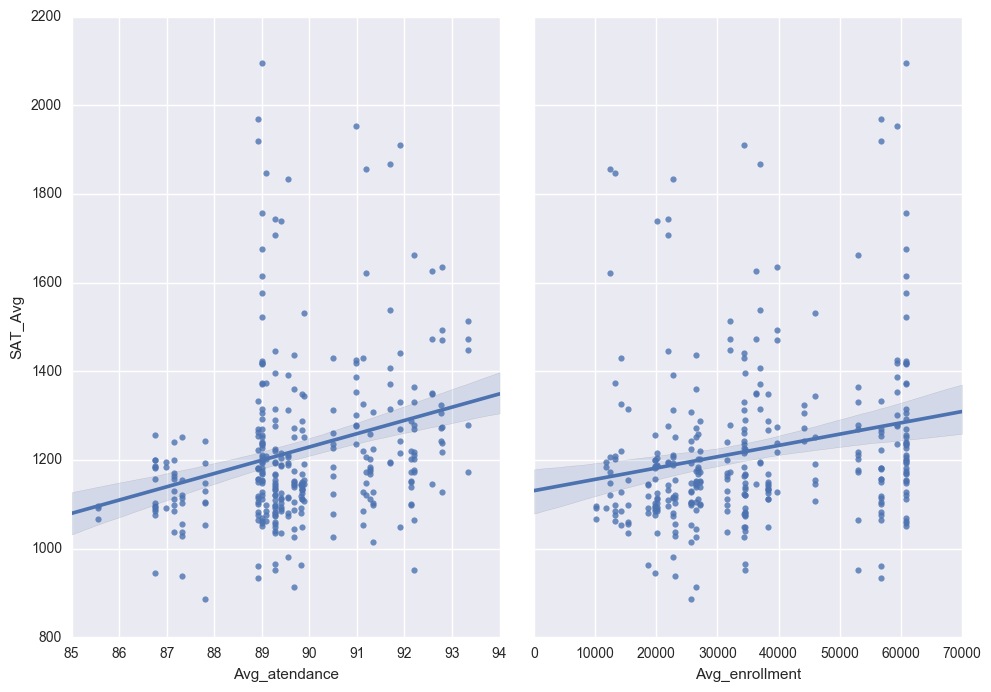

In [27]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=[ 'Avg_atendance',
                                               'Avg_enrollment'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

###### In the graph above, we compare the average of atendance and average of enrollment to SAT score. We can see school never have high SAT score with low attendance. Both of attendance and enrollment do not have strong relationship with SAT score.

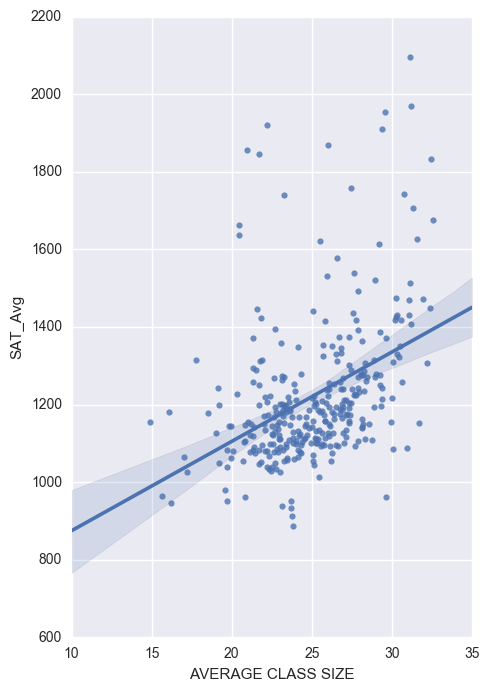

In [28]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['AVERAGE CLASS SIZE'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

###### In average class size VS SAT score graph, we have high SAT score with large class size. This is different from what was think. We think school should have high SAT score with small class size, because with small class size teacher can spend more time in each student.

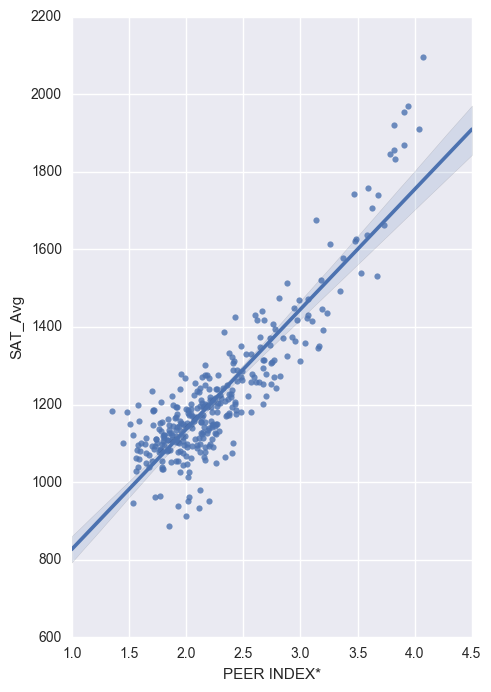

In [29]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['PEER INDEX*'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

###### Peer Index has strongest relationship with SAT score. From the graph above, we can easily find school with higher peer index have higher SAT score.

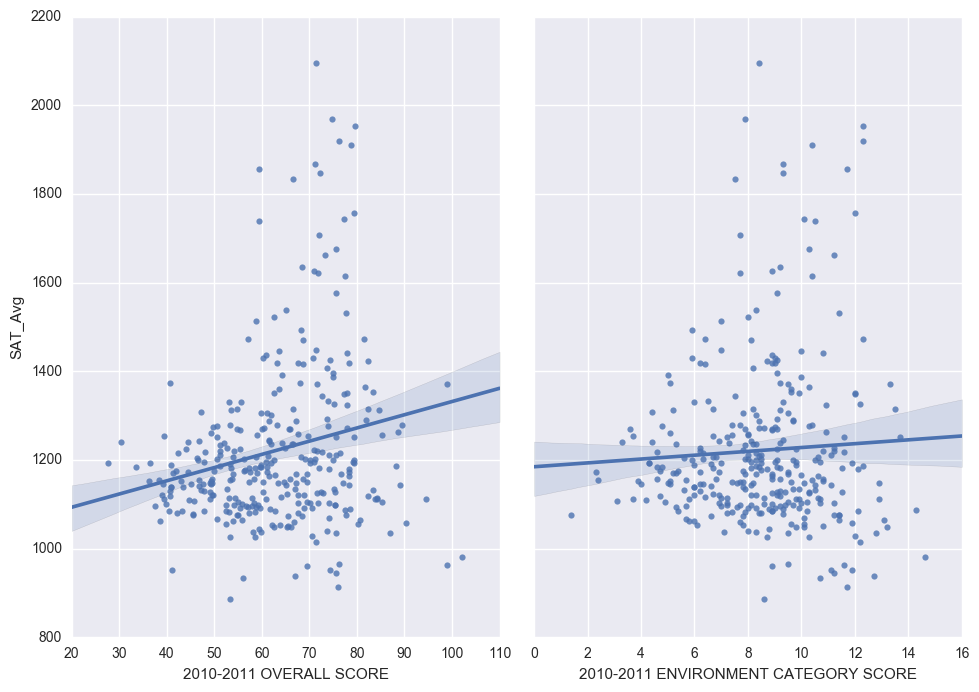

In [30]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['2010-2011 OVERALL SCORE',
                                               '2010-2011 ENVIRONMENT CATEGORY SCORE'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

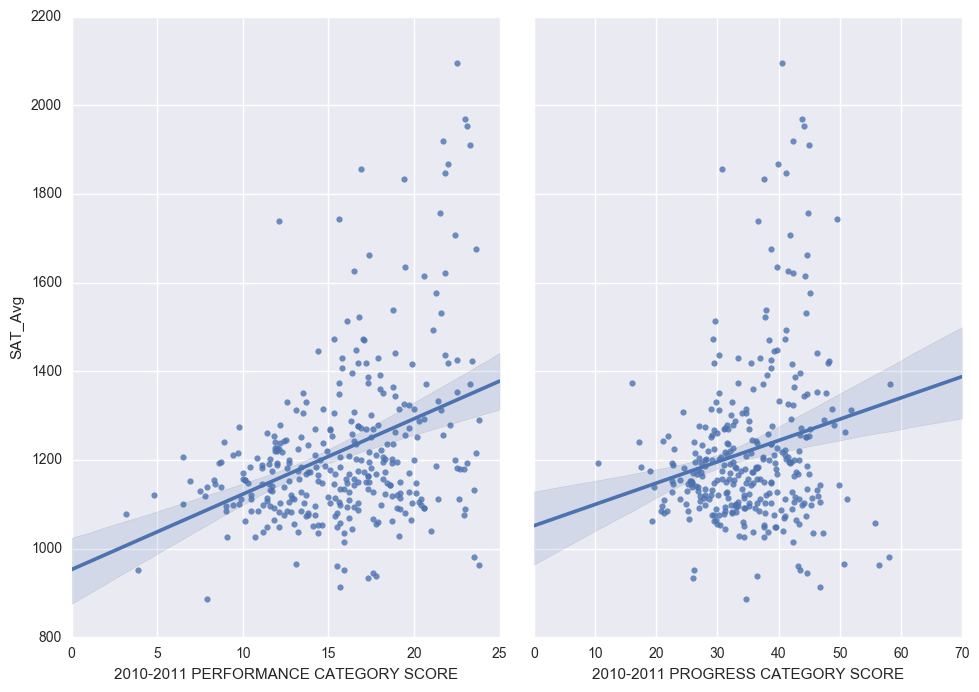

In [31]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['2010-2011 PERFORMANCE CATEGORY SCORE',
                                               '2010-2011 PROGRESS CATEGORY SCORE'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

###### From the graph above, we can see the environment category score almost have no relationship with SAT score.

# regression


###### We use regression to predict SAT score.

In [32]:
feature_cols = ['AVERAGE CLASS SIZE','Avg_atendance','Avg_enrollment','PEER INDEX*', 
                '2010-2011 OVERALL SCORE','2010-2011 ENVIRONMENT CATEGORY SCORE',
                '2010-2011 PERFORMANCE CATEGORY SCORE','2010-2011 PROGRESS CATEGORY SCORE']

In [33]:
data_feature = sat_size_atte_grade_temp[feature_cols]

In [34]:
data_target = sat_size_atte_grade_temp['SAT_Avg']

In [35]:
data_feature.shape

(323, 8)

In [36]:
data_target.shape

(323,)

## cross validation

###### We did cross validation to find root mean square error. root-mean-square error  is a  used measure of the differences between values  predicted by a model and the values actually observed. We have to find the model with smallest RMSE.

### LinearRegression

In [37]:
linear_reg = LinearRegression()
linreg_scores = cross_val_score(linear_reg, data_feature, data_target, cv=10, scoring='mean_squared_error')
mse_linreg_scores = -linreg_scores
rmse_linreg_scores = np.sqrt(mse_linreg_scores)
print(rmse_linreg_scores)

[ 102.24395677   59.12236988   90.30261835  100.84664724   87.2531547
   78.52114641   79.42218592   72.67914299   80.32337904   78.56719354]


In [38]:
print(rmse_linreg_scores.mean())

82.9281794831


### BayesianRidge

In [39]:
from sklearn.linear_model import BayesianRidge
bay_ridge = BayesianRidge()
bay_ridge_scores = cross_val_score(bay_ridge, data_feature, data_target, cv=10, scoring='mean_squared_error')
mse_bay_ridge_scores = -bay_ridge_scores
rmse_bay_ridge_scores = np.sqrt(mse_bay_ridge_scores)
rmse_bay_ridge_scores
rmse_bay_ridge_scores.mean()

82.920231518837952

###  Ridge Regression

In [40]:
from sklearn.linear_model import Ridge, RidgeCV
ridge_reg = Ridge(alpha = .1)
ridge_reg_scores = cross_val_score(ridge_reg, data_feature, data_target, cv=5, scoring='mean_squared_error')
rmse_ridge_reg_scores = np.sqrt(-ridge_reg_scores)
rmse_ridge_reg_scores.mean()

83.787356818127918

### Lasso

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg_scores = cross_val_score(lasso_reg, data_feature, data_target, cv=5, scoring='mean_squared_error')
rmse_lasso_reg_scores = np.sqrt(-lasso_reg_scores)
rmse_lasso_reg_scores.mean()

83.78124685266279

###### The rmse is about 83, it look like large. But it is SAT score, which has range from 0 to 2400. So 83 is ok.

### predict SAT Score by using Linear regression

###### By compare the rmse above, we find Linear regression and BayesianRidge are best model for our data. Here we choose Linear regression.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_target, random_state=1)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 8)
(242,)
(81, 8)
(81,)


In [44]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
linreg.score(X_train, y_train)

0.80641956439190243

In [46]:
linreg.score(X_test, y_test)

0.83941470683529418

In [60]:
y_test.shape

(81,)

In [62]:
X_test.shape

(81, 8)

In [47]:
predict_sat = linreg.predict(X_test)

In [48]:
predict_sat

array([  989.53378268,  1036.6444607 ,  1714.39000827,  1067.73177634,
        1123.7424636 ,  1109.09489095,  1235.12568317,  1607.62560357,
        1301.83980401,  1206.17151921,  1117.98947602,  1157.45531852,
        1146.74096955,  1431.93193737,   915.20467821,   963.24402122,
        1184.11193381,  1121.44260802,  1228.57203999,  1550.15670977,
        1011.61655296,  1082.59188434,  1093.45263336,  1233.92597009,
        1045.77535686,  1179.92480946,  1211.81588038,  1189.48486623,
        1608.41065284,  1301.75489372,  1130.80882253,  1046.02804274,
        1239.76571765,  1361.09759899,  1178.77443669,   985.40708387,
        1060.15396818,  1083.62173073,  1209.73577172,  1087.90732429,
        1011.1512101 ,  1272.55822689,  1047.80191989,  1175.17592132,
        1250.26012011,  1018.32119344,  1047.1400117 ,  1233.7455108 ,
        1198.13243953,  1048.41937747,  1378.61869726,  1346.856148  ,
        1239.93819964,  1154.60981583,  1221.89925412,  1612.67225972,
      

In [49]:
y_test.values

array([ 1029.,  1148.,  1868.,  1080.,  1127.,   951.,  1206.,  1627.,
        1348.,  1177.,  1106.,  1064.,  1092.,  1514.,   945.,  1182.,
        1095.,  1176.,  1193.,  1522.,  1200.,  1112.,  1126.,  1210.,
        1158.,  1175.,  1269.,  1139.,  1663.,  1288.,  1045.,  1039.,
        1243.,  1431.,  1114.,  1060.,  1186.,  1121.,  1277.,  1051.,
        1062.,  1306.,  1055.,  1199.,  1315.,  1151.,  1184.,  1187.,
        1272.,  1096.,  1221.,  1330.,  1204.,  1169.,  1290.,  1538.,
        1910.,  1038.,  1333.,  1129.,  1621.,  1084.,  1090.,  1969.,
        1144.,  1111.,  1224.,  1176.,  1122.,  1147.,   962.,  1221.,
        1116.,  1135.,  1085.,  1202.,  1171.,  1424.,  1360.,  1185.,
        1391.])

In [50]:
len(predict_sat)


81

### Compare SAT score we predict with real observed.

In [51]:
predict_x = [i for i in range(81)]

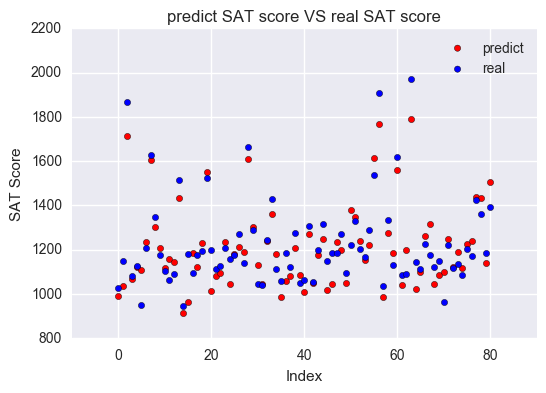

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(predict_x,predict_sat,c='r',label='predict')
ax.scatter(predict_x,y_test,c='b',label='real')
ax.set_ylabel("SAT Score")
ax.set_xlabel("Index")
ax.set_title("predict SAT score VS real SAT score")
ax.legend()

#### sort the real score

In [66]:
d = {'real' : pd.Series(y_test.values, index=predict_x),
     'predict' : pd.Series(predict_sat, index=predict_x)}

In [67]:
df = pd.DataFrame(d)

In [81]:
df.head()

,predict,real
0,989.533783,1029.0
1,1036.644461,1148.0
2,1714.390008,1868.0
3,1067.731776,1080.0
4,1123.742464,1127.0


In [82]:
df_sorted = df.sort_values(['real'])

In [83]:
df_sorted.head()

,predict,real
14,915.204678,945.0
5,1109.094891,951.0
70,1098.243340,962.0
0,989.533783,1029.0
57,987.337323,1038.0


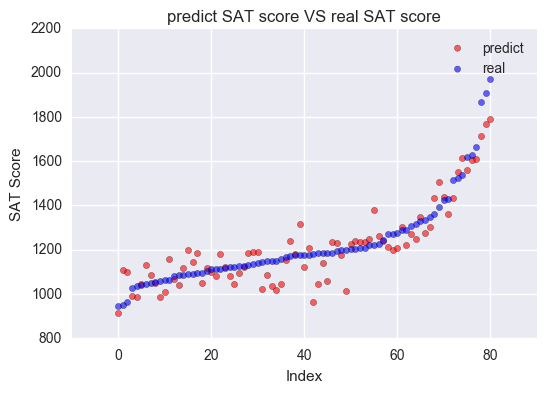

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(predict_x,df_sorted['predict'],c='r',label='predict', alpha=0.6)
ax.scatter(predict_x,df_sorted['real'],c='b',label='real', alpha=0.6)
ax.set_ylabel("SAT Score")
ax.set_xlabel("Index")
ax.set_title("predict SAT score VS real SAT score")
ax.legend()

###### From the graph above, we can see the distance between the real SAT score and the predict SAT score. Most of point are close to each other.

# Conclusion

In [ ]:
['AVERAGE CLASS SIZE','Avg_atendance','Avg_enrollment','PEER INDEX*', 
                '2010-2011 OVERALL SCORE','2010-2011 ENVIRONMENT CATEGORY SCORE',
                '2010-2011 PERFORMANCE CATEGORY SCORE','2010-2011 PROGRESS CATEGORY SCORE']

###### In conclusion, we predict the SAT score of high schools in NYC by using regression. For feature, we use average of class size, average of enrollment, peer index, environment score, performance score, progress score and overall score. And, our target is SAT score. We did cross validation, and get root mean square error about 83. We choose to use Linean regression after compare root mean square error. For visualize how well the model are, we predict the SAT score by puting testing data to the model we trained. Also, we put the real SAT score and the predict SAT score in a scatter plot. From the graph, we can see most of peridct and real SAT score are close to each other.